In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/IOT/ENB2012_data.csv")
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.shape

(768, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
data.rename(columns={'X1': 'Relative Compactness',
                     'X2': 'Surface Area',
                     'X3': 'Wall Area',
                     'X4': 'Roof Area',
                     'X5': 'Overall Height',
                     'X6': 'Orientation',
                     'X7': 'Glazing Area',
                     'X8': 'Glazing Area Distribution',
                     'Y1': 'Heating Load',
                     'Y2': 'Cooling Load'}, inplace=True)

In [ ]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [ ]:
correlation_table = data.corr()
print(correlation_table)

correlation_table.to_csv("correlation_table.csv", index=True)


                           Relative Compactness  Surface Area     Wall Area  \
Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing Area Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof Area  Overall Height   Orientation  \
Relative Compactness      -8.688234e-01    8.277473e-01  

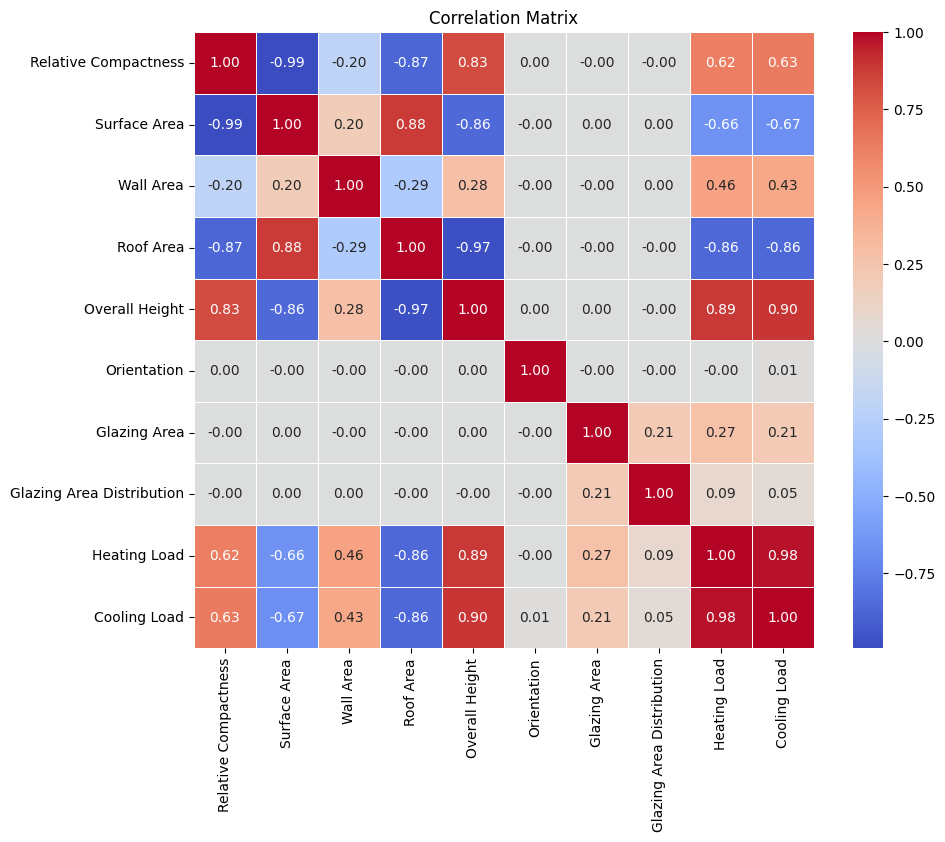

In [ ]:
correlation_matrix = data.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import statsmodels.api as sm
# Define independent variable (X1) and dependent variable (Y1)
X1 = data['Relative Compactness']
Y1 = data['Heating Load']

# Add constant term to the independent variable
X1 = sm.add_constant(X1)

model = sm.OLS(Y1, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     484.0
Date:                Sat, 11 May 2024   Prob (F-statistic):           1.59e-83
Time:                        04:39:31   Log-Likelihood:                -2676.5
No. Observations:                 768   AIC:                             5357.
Df Residuals:                     766   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -23.0530 

In [ ]:
# # Plot pair plots of all variables
# sns.pairplot(data)
# plt.show()


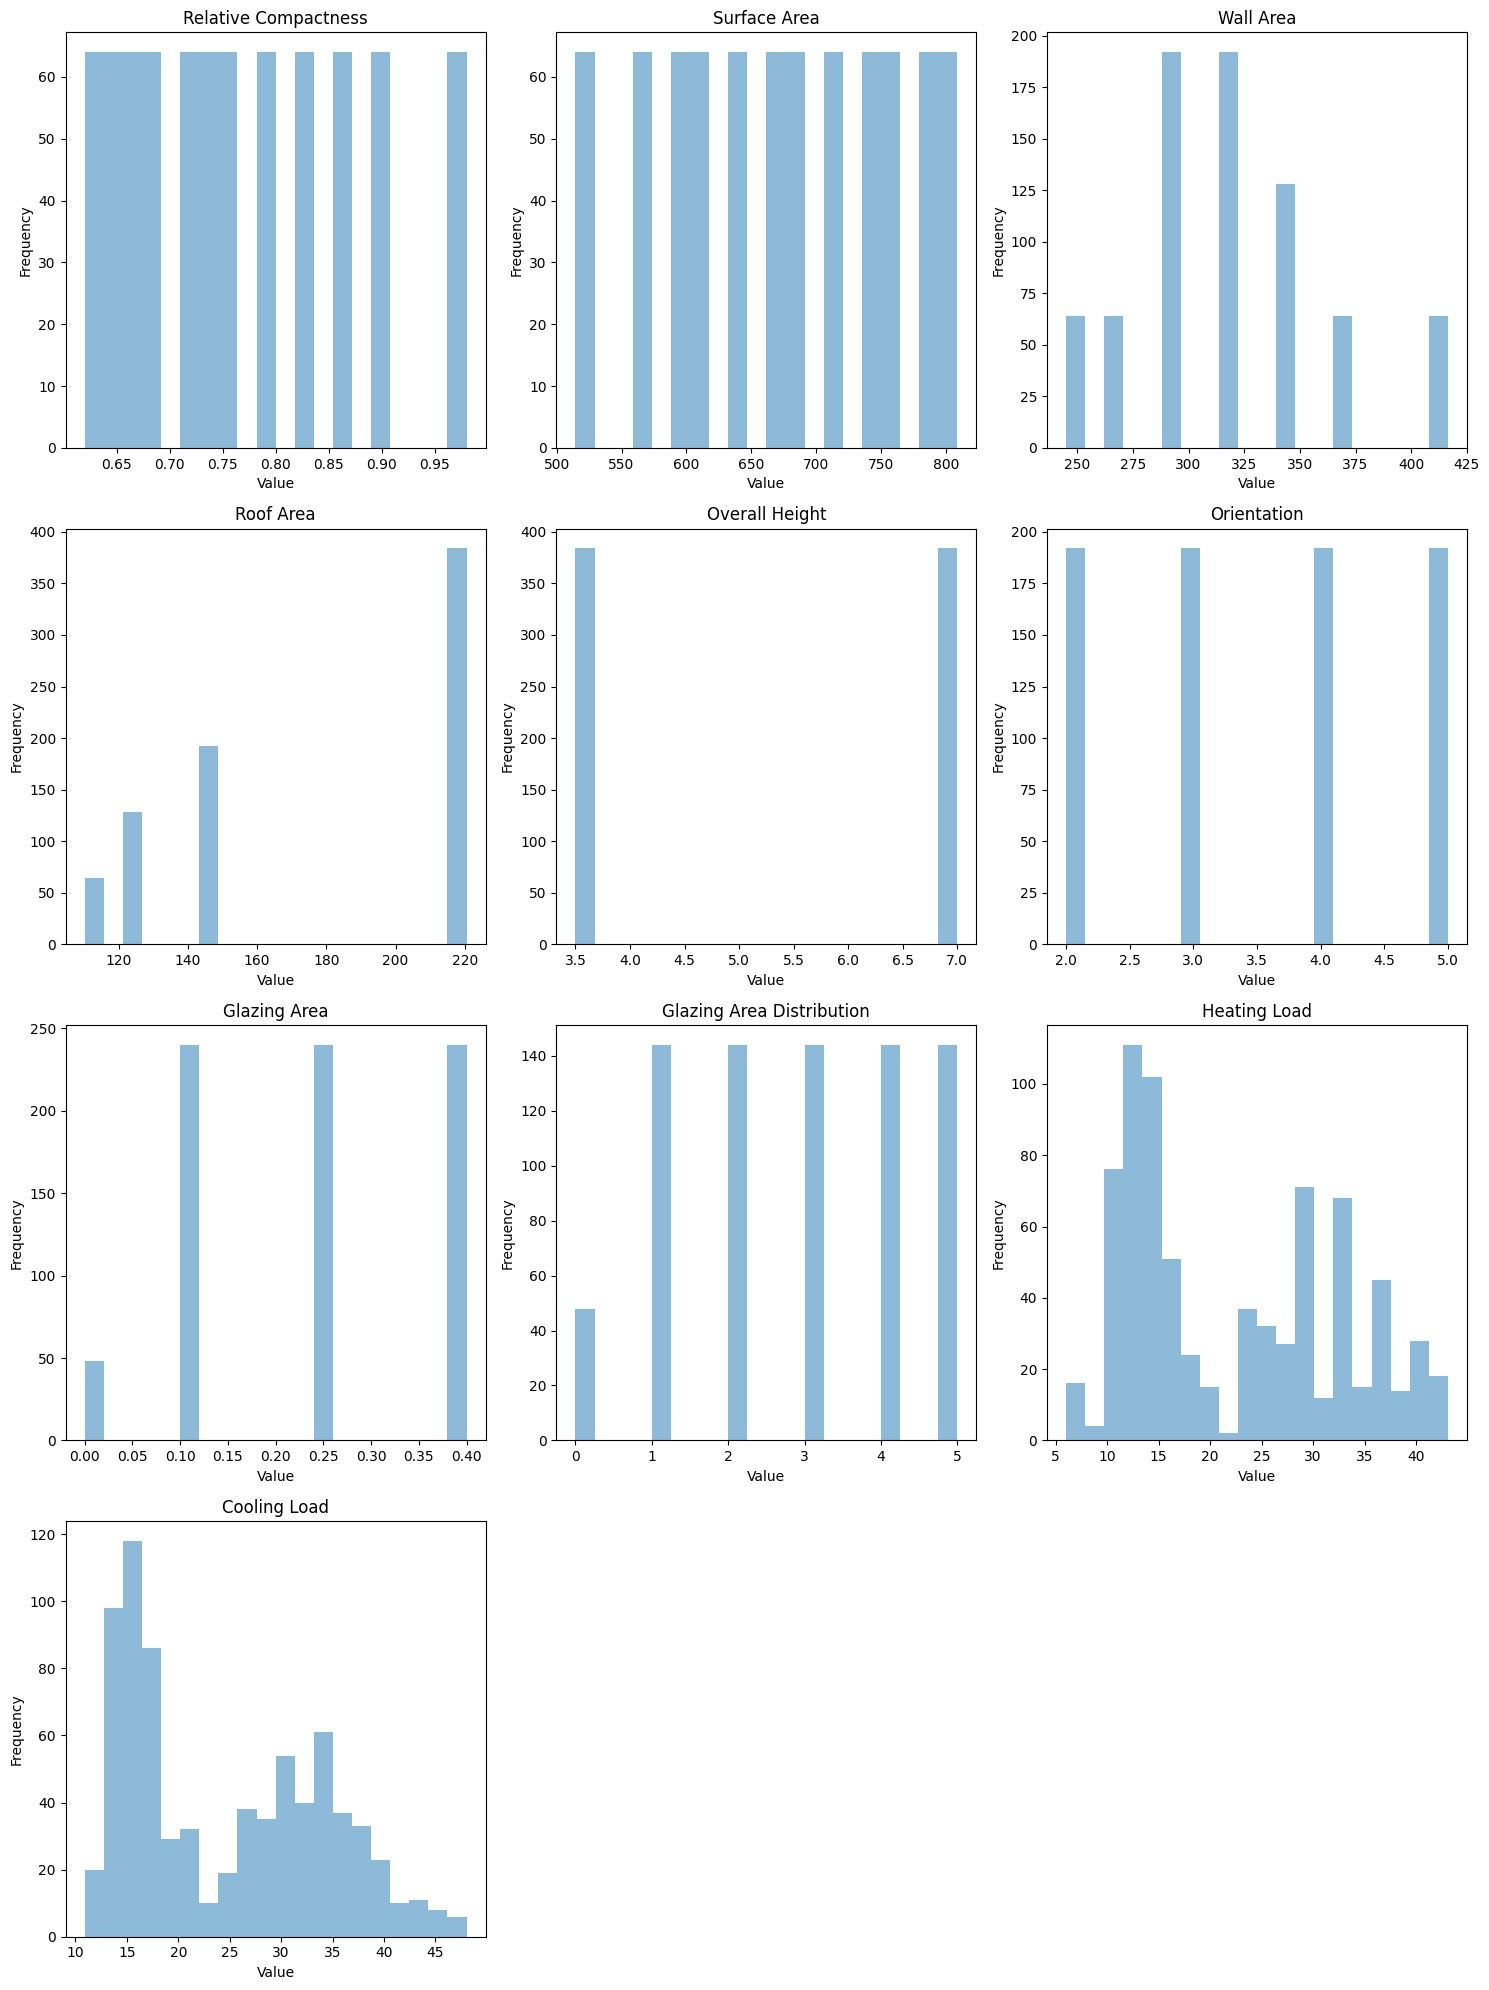

In [ ]:
# Plot separate histograms for each individual variable
num_variables = len(data.columns)
num_rows = (num_variables + 2) // 3  # Calculate number of rows needed for subplots
num_cols = min(3, num_variables)  # Maximum of 3 columns

plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(data[col], bins=20, alpha=0.5)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


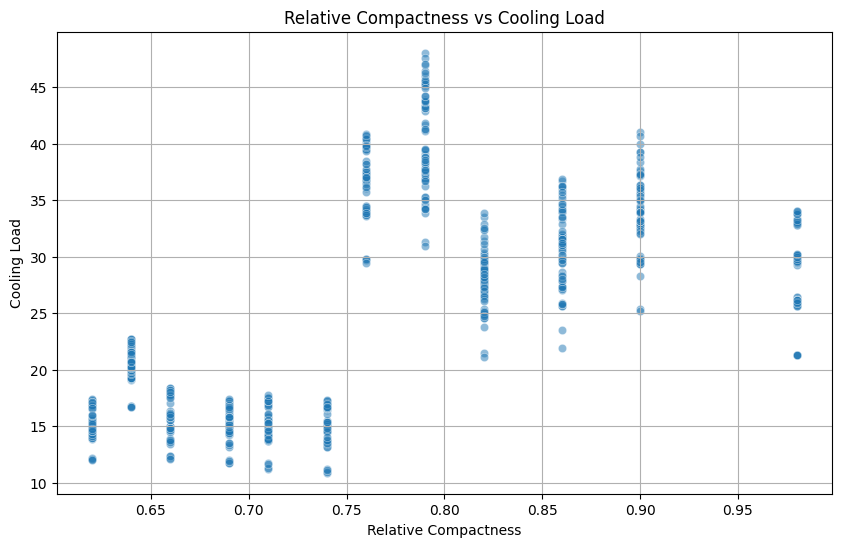

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Relative Compactness', y='Cooling Load', alpha=0.5)
plt.title('Relative Compactness vs Cooling Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.show()


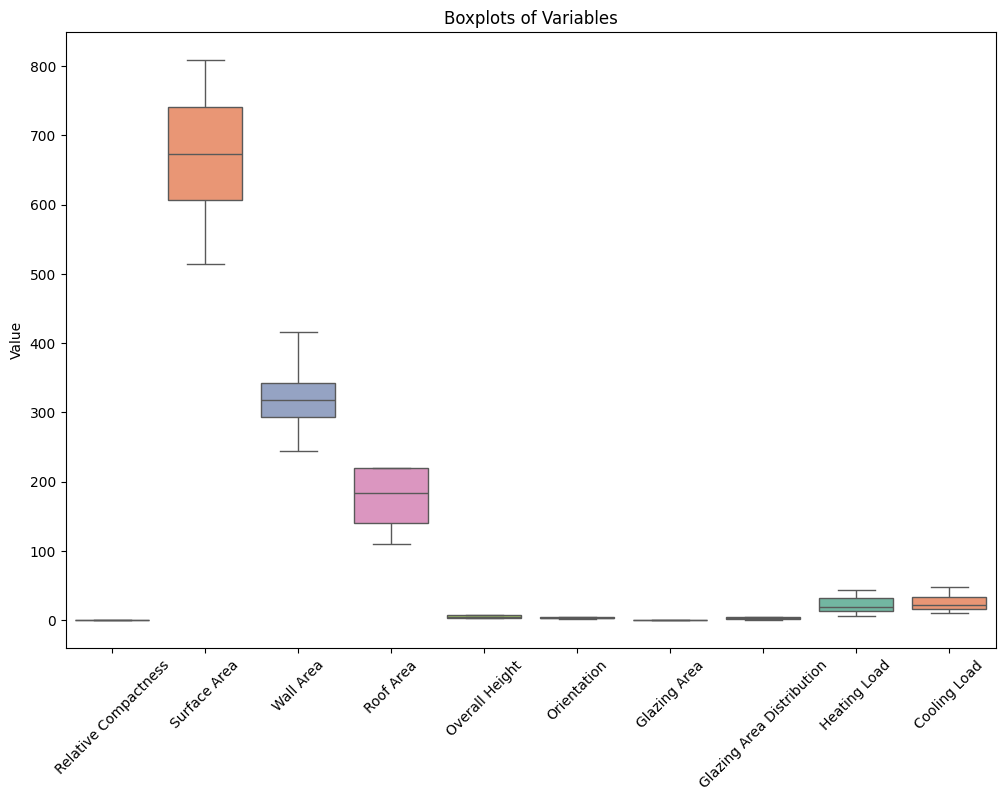

In [ ]:
# Plot boxplots for each variable to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="v", palette="Set2")
plt.title('Boxplots of Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
df = pd.DataFrame(data_scaled, columns=data.columns)
df


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366
...,...,...,...,...,...,...,...,...,...,...
763,-1.174613,1.275625,0.561951,0.972512,-1.0,1.341641,1.244049,1.411336,-0.439049,-0.335303
764,-1.363812,1.553943,1.123903,0.972512,-1.0,-1.341641,1.244049,1.411336,-0.571937,-0.810736
765,-1.363812,1.553943,1.123903,0.972512,-1.0,-0.447214,1.244049,1.411336,-0.581854,-0.786544
766,-1.363812,1.553943,1.123903,0.972512,-1.0,0.447214,1.244049,1.411336,-0.577887,-0.839136


In [ ]:
x_heating = df.drop(columns=['Heating Load'])
x_cooling = df.drop(columns=['Cooling Load'])

y_cooling = df['Cooling Load']
y_heating = df['Heating Load']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x_heating, y_heating, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(x_cooling, y_cooling, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (614, 9) Target: (614,)
Test set - Features: (154, 9) Target: (154,)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest for Heating Load
selector_heating = SelectKBest(score_func=f_regression, k=5)
X_train_selected_heating = selector_heating.fit_transform(X_train, y_train)
X_test_selected_heating = selector_heating.transform(X_test)

# Get selected feature names for heating load
selected_features_heating = X_train.columns[selector_heating.get_support()]

# SelectKBest for Cooling Load
selector_cooling = SelectKBest(score_func=f_regression, k=5)
X_train_selected_cooling = selector_cooling.fit_transform(X2_train, y2_train)
X_test_selected_cooling = selector_cooling.transform(X2_test)

# Get selected feature names for cooling load
selected_features_cooling = X2_train.columns[selector_cooling.get_support()]

# Print selected features for Heating Load
print("Selected features for Heating Load:")
print(selected_features_heating)

# Print selected features for Cooling Load
print("\nSelected features for Cooling Load:")
print(selected_features_cooling)


Selected features for Heating Load:
Index(['Relative Compactness', 'Surface Area', 'Roof Area', 'Overall Height',
       'Cooling Load'],
      dtype='object')

Selected features for Cooling Load:
Index(['Relative Compactness', 'Surface Area', 'Roof Area', 'Overall Height',
       'Heating Load'],
      dtype='object')



Support Vector Regressor:
MSE: 0.03524169787126499
RMSE: 0.18772772270302804
R-squared: 0.9656211809420263
MAE: 0.1283522678597773
Max Error: 0.8420252302615118
MAPE: 0.3568103067671806


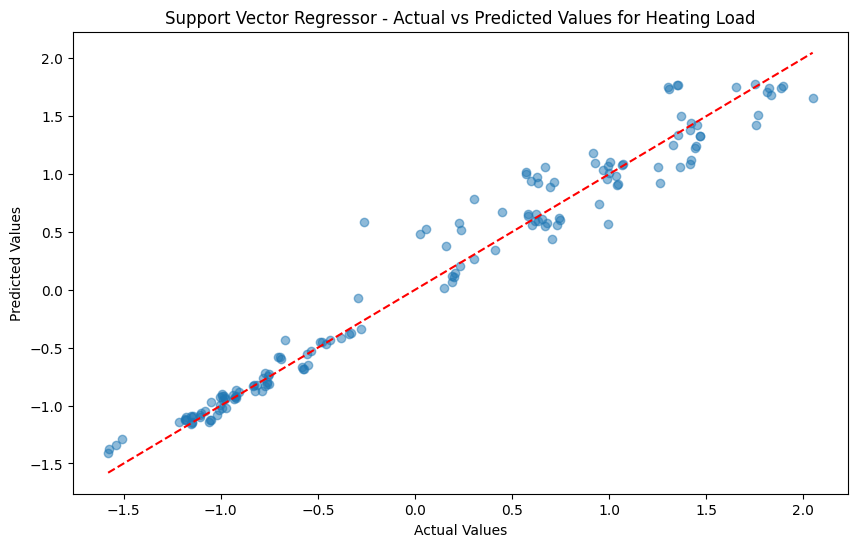

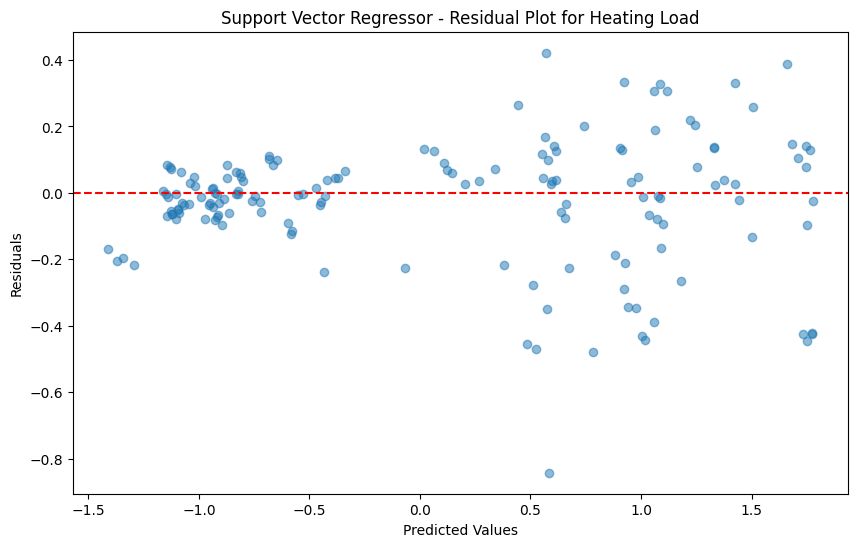


Gradient Boosting Regressor:
MSE: 0.026252097352542064
RMSE: 0.16202498990137928
R-squared: 0.9743906747038077
MAE: 0.09483554383852541
Max Error: 0.8785082291497499
MAPE: 0.30521979672865085


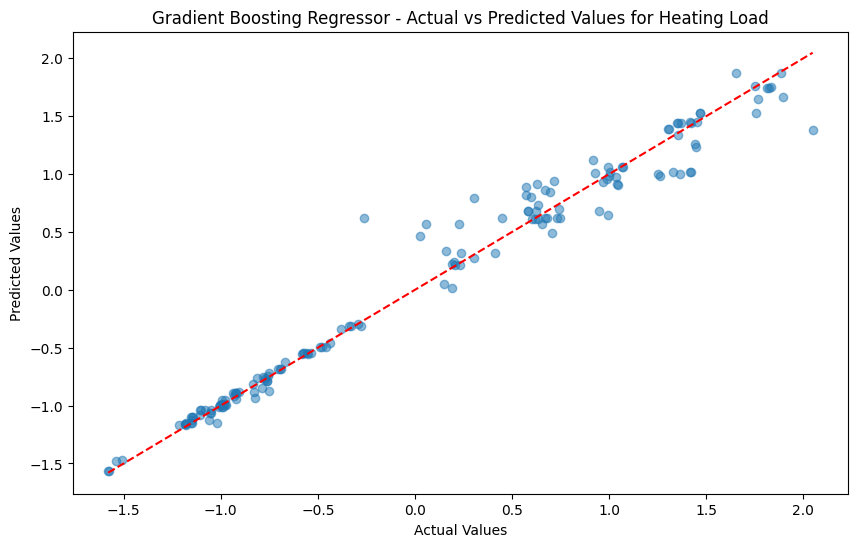

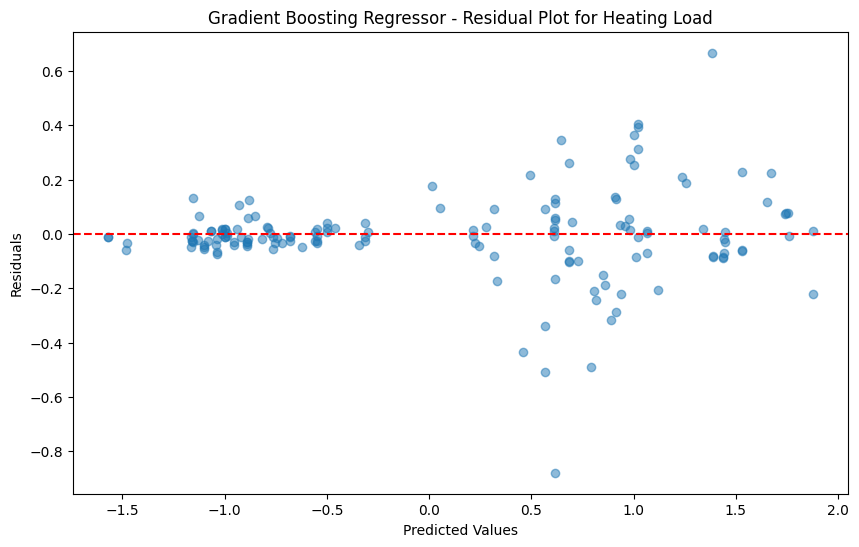


Random Forest Regressor:
MSE: 0.020257712665889435
RMSE: 0.14232959167330395
R-squared: 0.9802382892897766
MAE: 0.06980226183124978
Max Error: 0.9332755342665197
MAPE: 0.2835276631816122


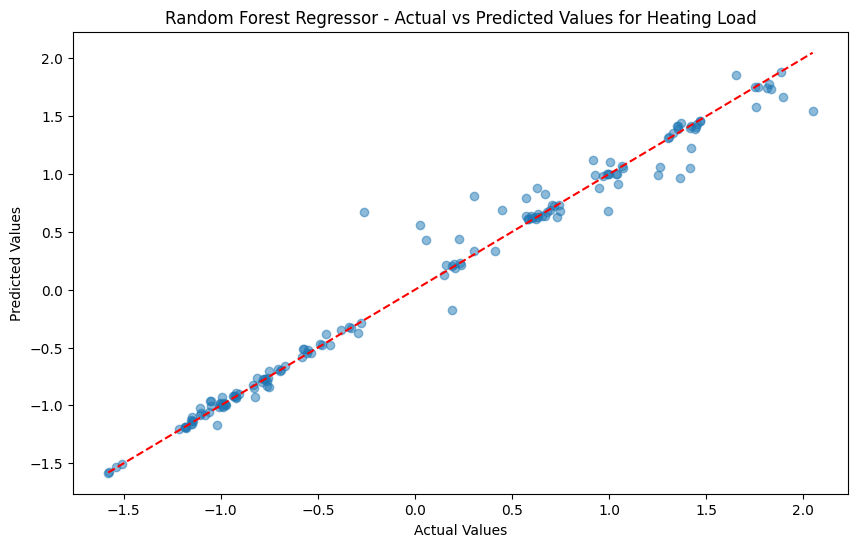

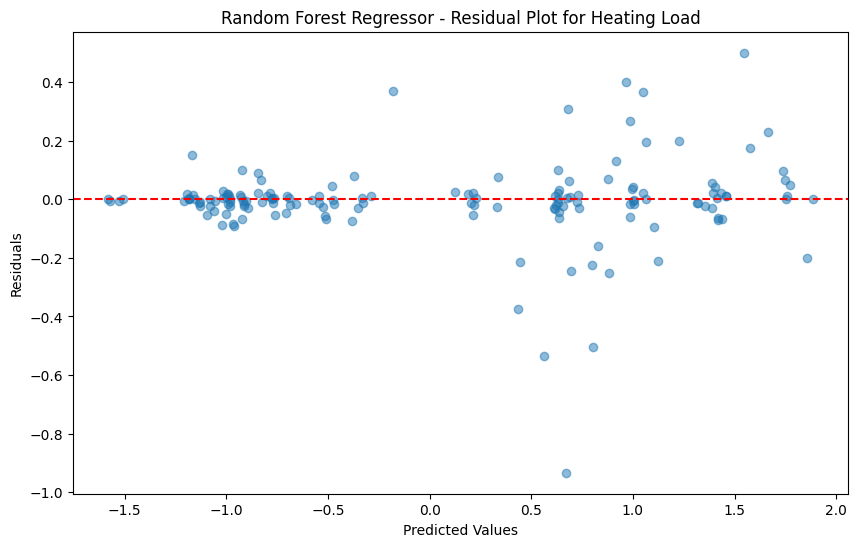


K-Nearest Neighbours Regressor:
MSE: 0.02395446335272113
RMSE: 0.15477229517171712
R-squared: 0.9766320520582654
MAE: 0.0824726645053245
Max Error: 0.9530303358164282
MAPE: 0.24426034006230543


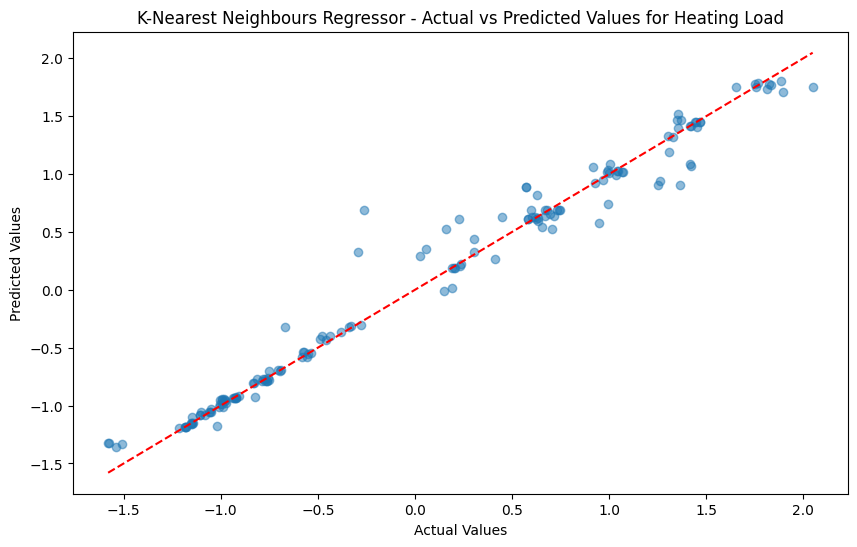

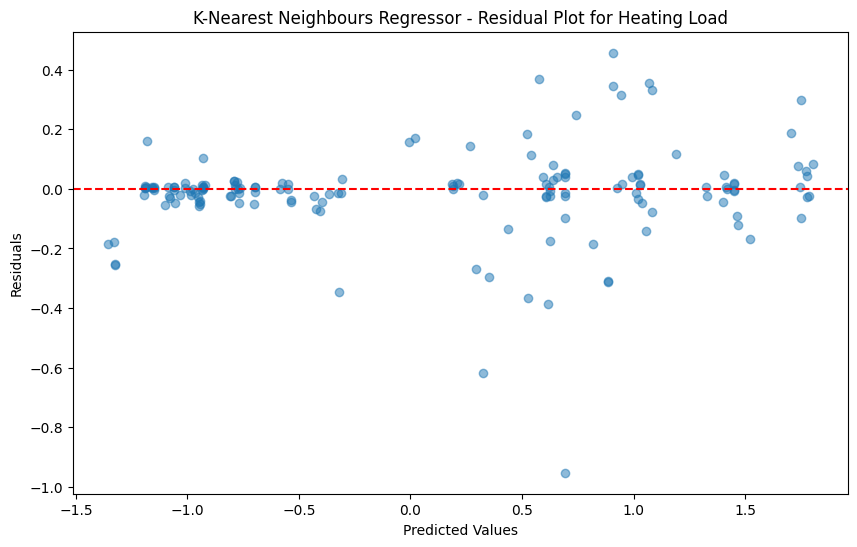


Neural Network Regressor:
MSE: 0.04323958677106403
RMSE: 0.20794130607232425
R-squared: 0.9578191171386203
MAE: 0.14750926300562336
Max Error: 0.8262532577114152
MAPE: 0.37250499471277904


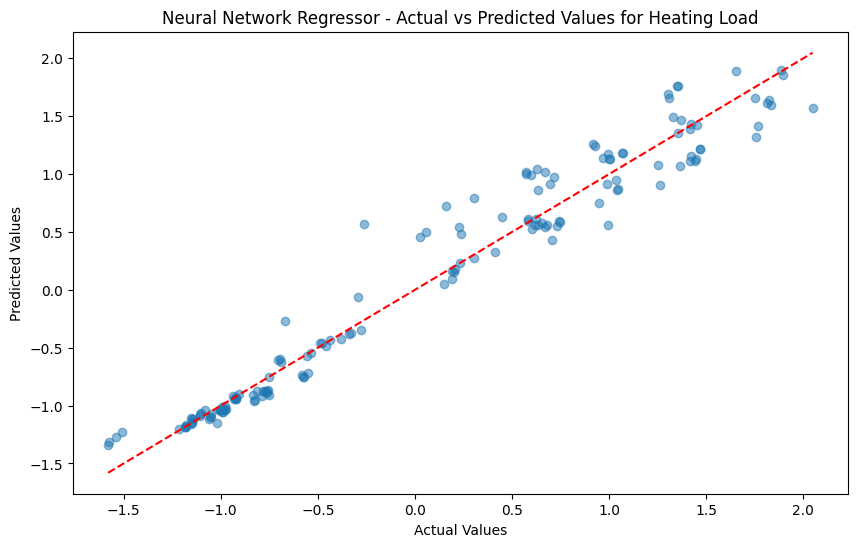

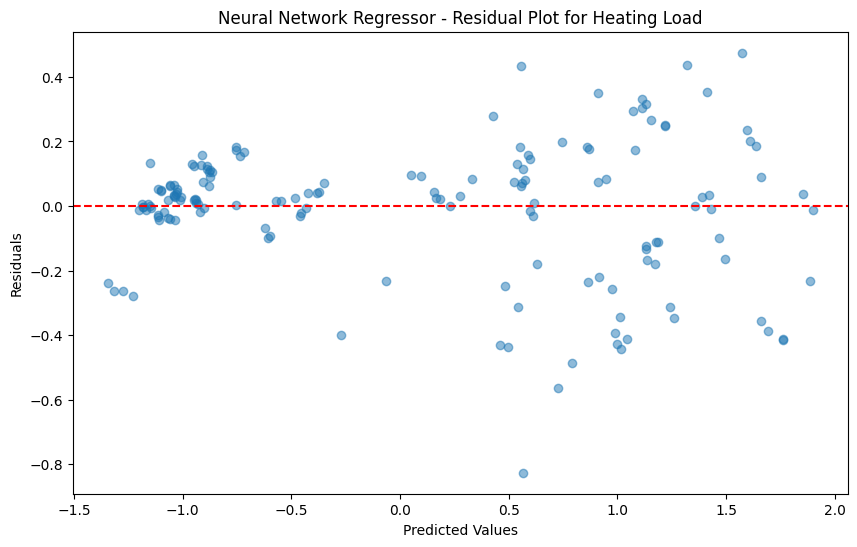


Decision Tree Regressor:
MSE: 0.023195819957698448
RMSE: 0.15230173983805453
R-squared: 0.9773721203745618
MAE: 0.06667619023097761
Max Error: 0.9292293700936454
MAPE: 0.33743724655781626


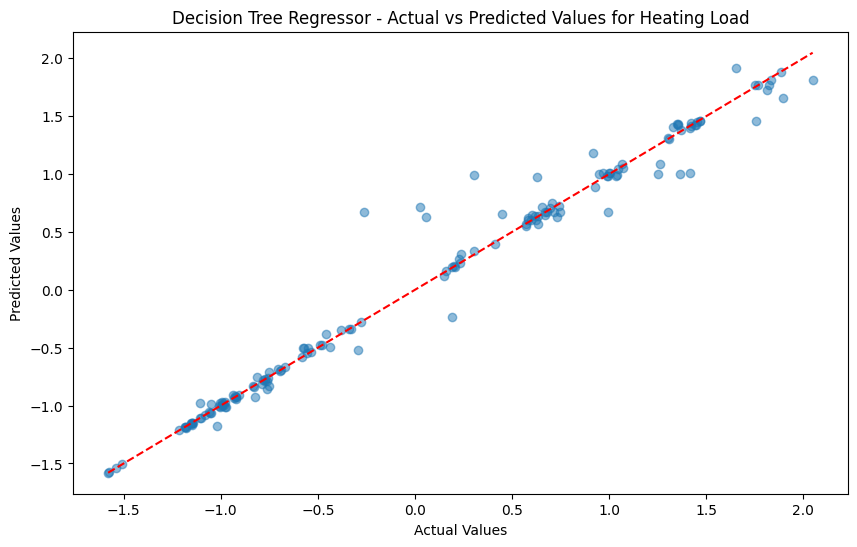

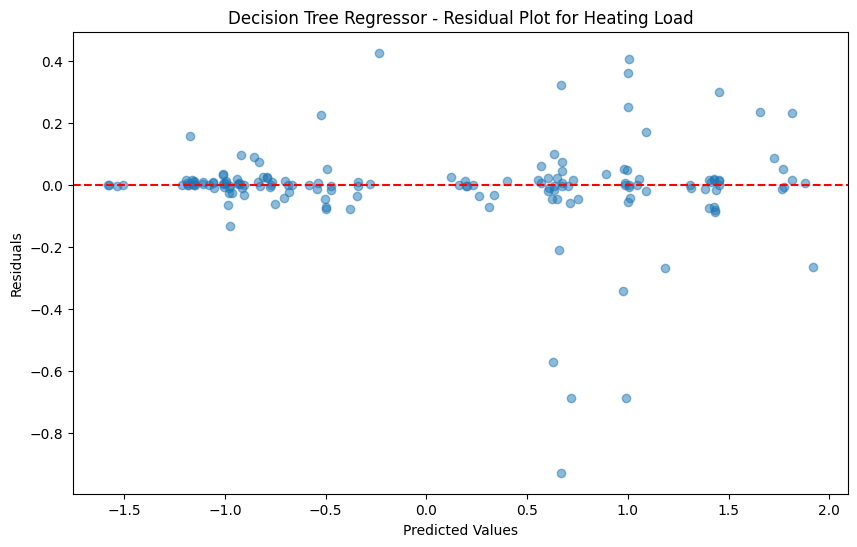


Evaluation Metrics for Heating Load:
Support Vector Regressor: 
MSE: 0.04, RMSE: 0.19, R-squared: 0.97, MAE: 0.13, Max Error: 0.84,  MAPE: 0.36

Gradient Boosting Regressor: 
MSE: 0.03, RMSE: 0.16, R-squared: 0.97, MAE: 0.09, Max Error: 0.88,  MAPE: 0.31

Random Forest Regressor: 
MSE: 0.02, RMSE: 0.14, R-squared: 0.98, MAE: 0.07, Max Error: 0.93,  MAPE: 0.28

K-Nearest Neighbours Regressor: 
MSE: 0.02, RMSE: 0.15, R-squared: 0.98, MAE: 0.08, Max Error: 0.95,  MAPE: 0.24

Neural Network Regressor: 
MSE: 0.04, RMSE: 0.21, R-squared: 0.96, MAE: 0.15, Max Error: 0.83,  MAPE: 0.37

Decision Tree Regressor: 
MSE: 0.02, RMSE: 0.15, R-squared: 0.98, MAE: 0.07, Max Error: 0.93,  MAPE: 0.34



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Initialize models
models = {
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Nearest Neighbours Regressor": KNeighborsRegressor(),
    "Neural Network Regressor": MLPRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
}

evaluation_metrics = []

for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train_selected_heating, y_train)  # Using selected features for heating load

    # Predict using selected features for the test set
    y_pred = model.predict(X_test_selected_heating)

    # Evaluate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Print metrics
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}")
    print(f"Max Error: {max_err}")
    print(f"MAPE: {mape}")

# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Fit line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - Actual vs Predicted Values for Heating Load")
    plt.show()

# Plot residual plot
    residual = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residual, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residual Plot for Heating Load")
    plt.show()

    evaluation_metrics.append({'Model': name,
                              'MSE' : mse,
                              'RMSE' : rmse,
                              'R-squared' : r2,
                              'MAE' : mae,
                              'Max_error' : max_err,
                              'MAPE': mape})
print("\nEvaluation Metrics for Heating Load:")

for metric in evaluation_metrics:
    print(f"{metric['Model']}: \nMSE: {metric['MSE']:.2f}, RMSE: {metric['RMSE']:.2f}, R-squared: {metric['R-squared']:.2f}, MAE: {metric['MAE']:.2f}, Max Error: {metric['Max_error']:.2f},  MAPE: {metric['MAPE']:.2f}\n")

In [ ]:
# Define weights for each metric (higher weights indicate higher importance)
weights = {
    'MSE': 0.2,
    'RMSE': 0.2,
    'MAE': 0.2,
    'R-squared': 0.3,
    'Max Error': 0.1,
    'MAPE': 0.1
}

# Normalize metrics
def normalize(metric_values):
    min_val = min(metric_values)
    max_val = max(metric_values)
    return [(val - min_val) / (max_val - min_val) for val in metric_values]

# Calculate overall score for each model
overall_scores = {}
for metric in evaluation_metrics:
    normalized_metrics = [metric[key] for key in weights.keys() if key in metric]
    normalized_metrics = normalize(normalized_metrics)
    score = sum(weight * value for weight, value in zip(weights.values(), normalized_metrics))
    overall_scores[metric['Model']] = score

# Rank models based on overall scores
ranked_models = sorted(overall_scores.items(), key=lambda x: x[1], reverse=True)

# Print ranked models
print("Ranked Models for Heating Load:")
for idx, (model, score) in enumerate(ranked_models, start=1):
    print(f"{idx}. {model}: {score:.2f}")


Ranked Models for Heating Load:
1. Neural Network Regressor: 0.39
2. Support Vector Regressor: 0.39
3. Gradient Boosting Regressor: 0.37
4. Decision Tree Regressor: 0.37
5. Random Forest Regressor: 0.36
6. K-Nearest Neighbours Regressor: 0.36



Support Vector Regressor:
MSE: 0.04859927287070576
RMSE: 0.22045242768158796
R-squared: 0.9525924553144178
MAE: 0.15069564754952008
Max Error: 0.8097737497994697
MAPE: 0.7869302921311887


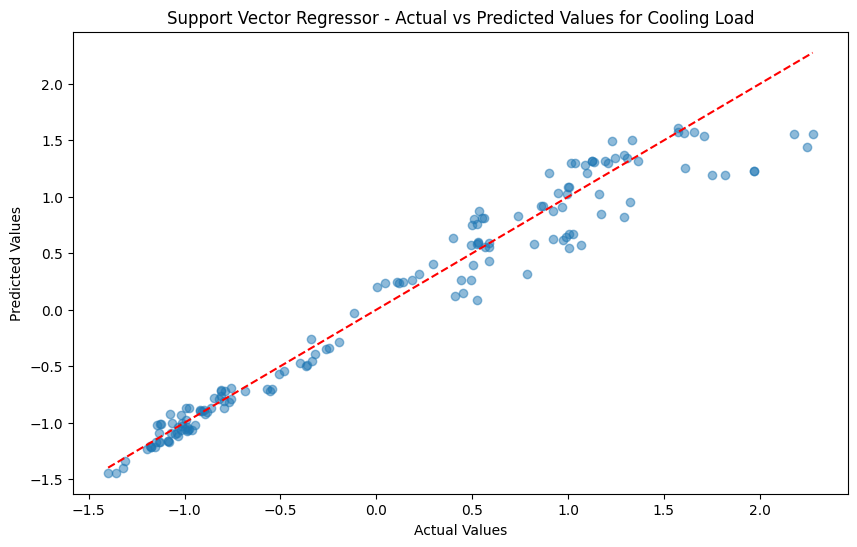

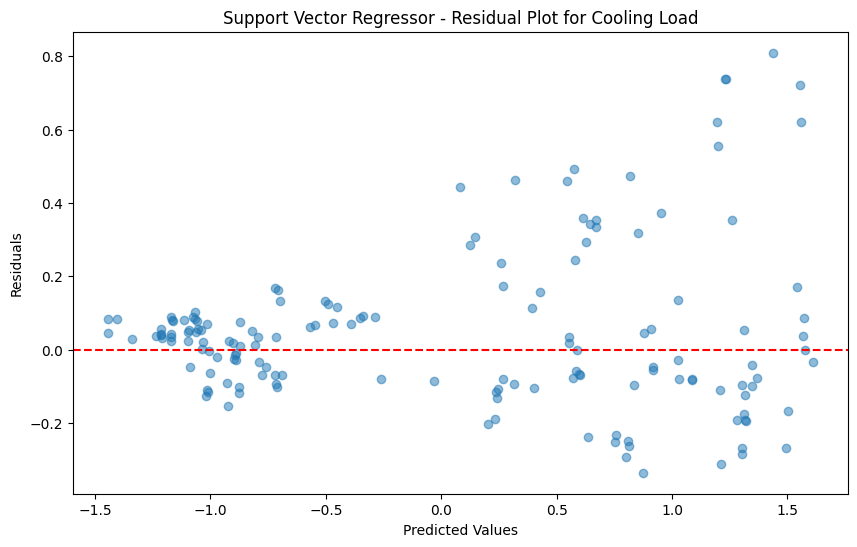


Gradient Boosting Regressor:
MSE: 0.019051402271031487
RMSE: 0.13802681721691437
R-squared: 0.9814157671270152
MAE: 0.09195273199395494
Max Error: 0.4275036340851994
MAPE: 0.6829960617445239


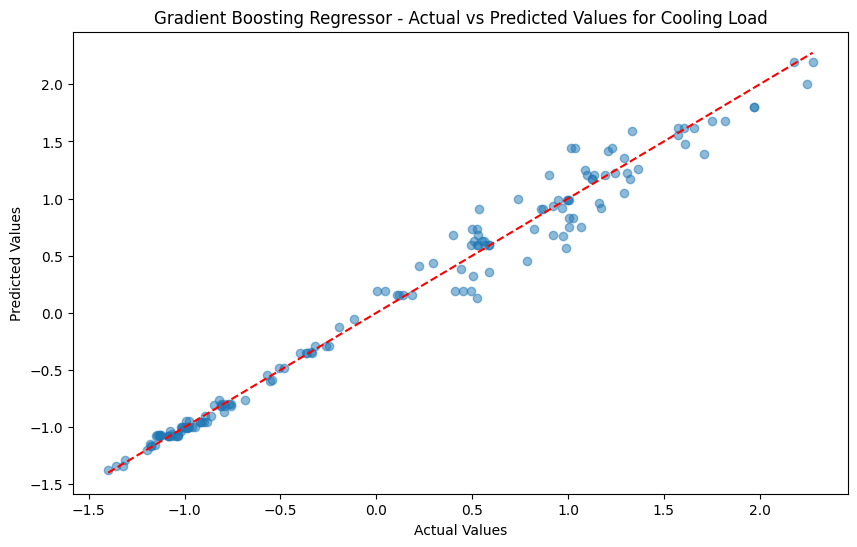

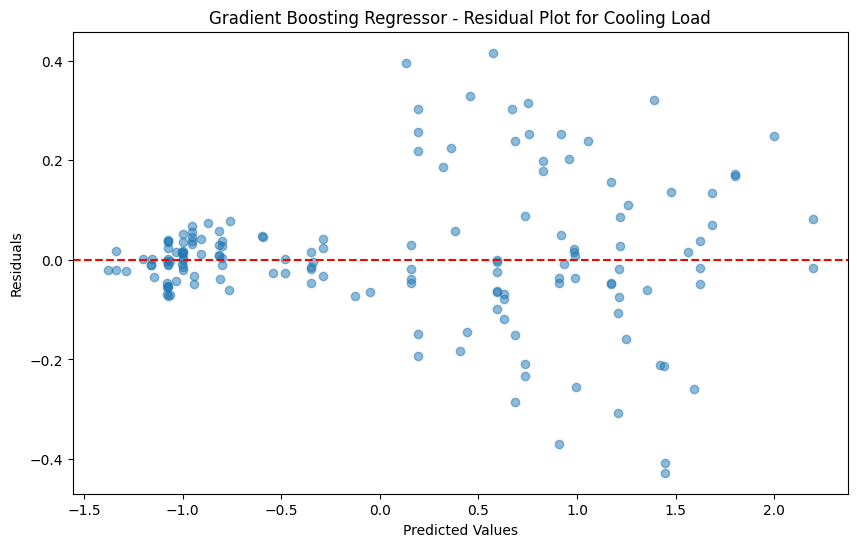


Random Forest Regressor:
MSE: 0.015913718684417242
RMSE: 0.12614958852258393
R-squared: 0.9844765099335459
MAE: 0.06980722075038884
Max Error: 0.5026027895700402
MAPE: 0.9188867180459249


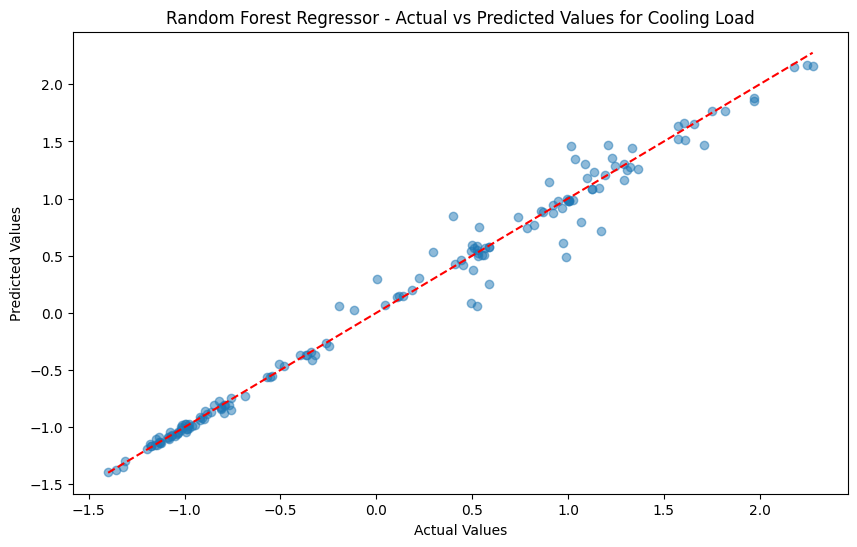

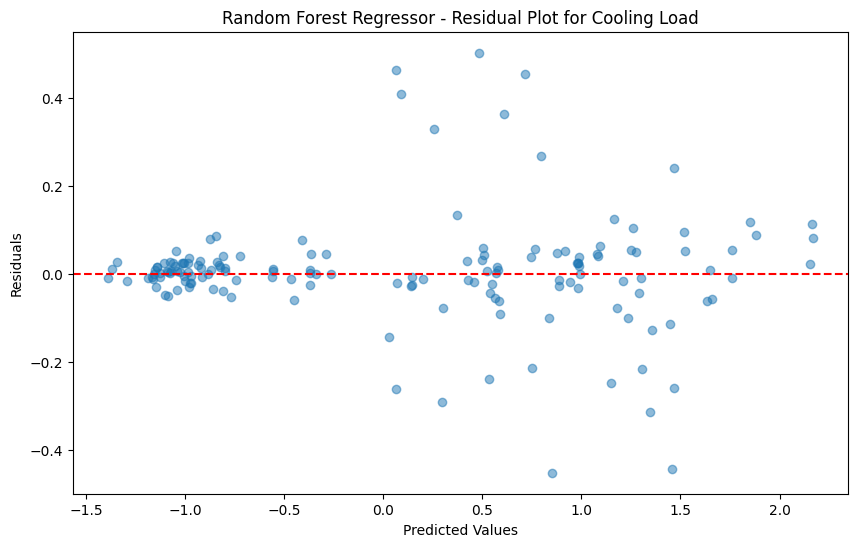


K-Nearest Neighbours Regressor:
MSE: 0.013918609877275506
RMSE: 0.11797715828615091
R-squared: 0.9864226956342826
MAE: 0.0771602968312747
Max Error: 0.4188444233446838
MAPE: 0.6565978568352788


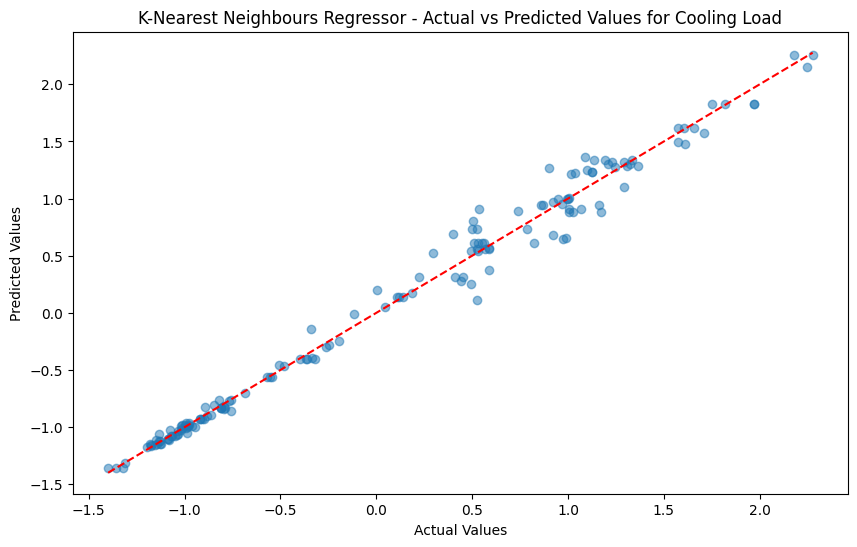

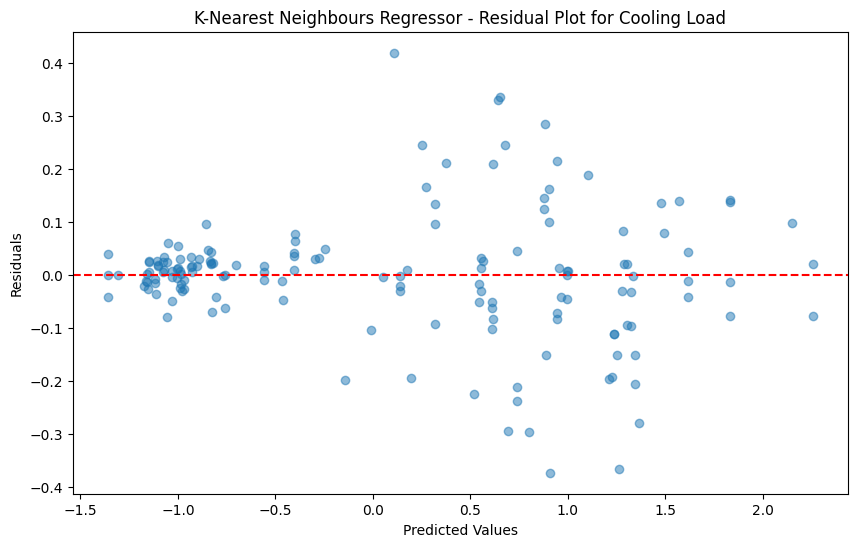


Neural Network Regressor:
MSE: 0.0460835513565577
RMSE: 0.21467079763339422
R-squared: 0.9550464875057172
MAE: 0.15372318438201257
Max Error: 0.6683697588047715
MAPE: 0.9888333410582195


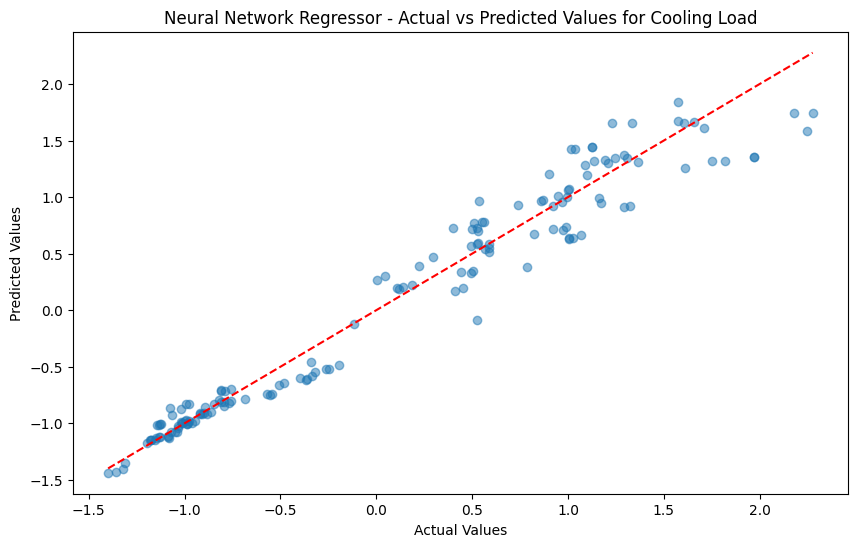

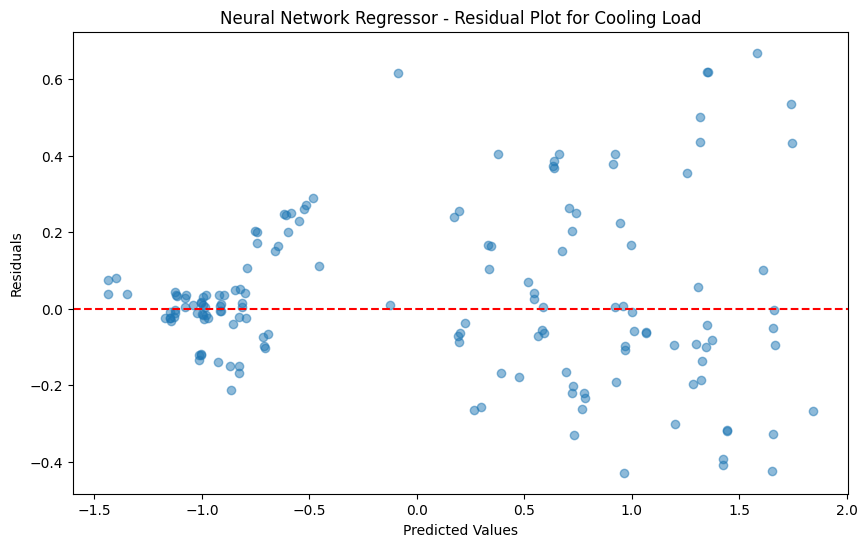


Decision Tree Regressor:
MSE: 0.015616245819054894
RMSE: 0.12496497837016135
R-squared: 0.9847666883112128
MAE: 0.06633563449365422
Max Error: 0.5890328404646482
MAPE: 0.9638848446723071


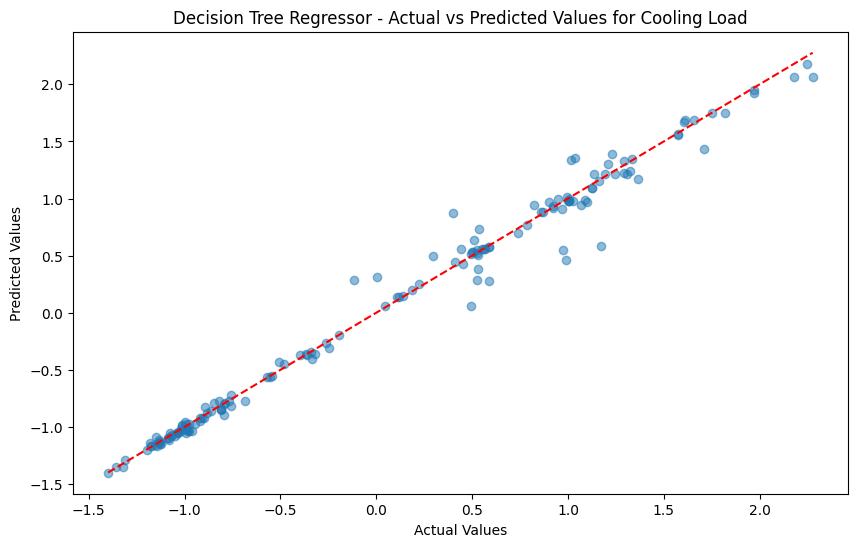

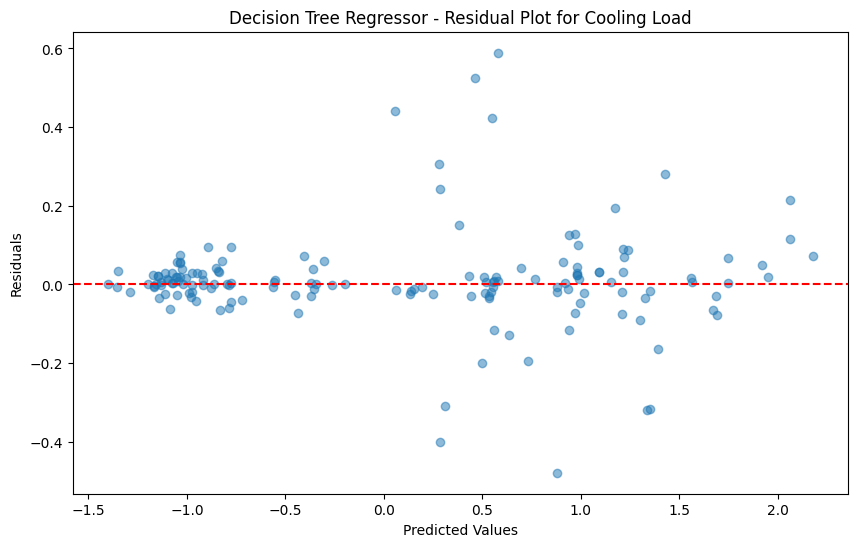


Evaluation Metrics for Cooling Load:
Support Vector Regressor: 
MSE: 0.05, RMSE: 0.22, R-squared: 0.95, MAE: 0.15, Max Error: 0.81, MAPE: 0.79

Gradient Boosting Regressor: 
MSE: 0.02, RMSE: 0.14, R-squared: 0.98, MAE: 0.09, Max Error: 0.43, MAPE: 0.68

Random Forest Regressor: 
MSE: 0.02, RMSE: 0.13, R-squared: 0.98, MAE: 0.07, Max Error: 0.50, MAPE: 0.92

K-Nearest Neighbours Regressor: 
MSE: 0.01, RMSE: 0.12, R-squared: 0.99, MAE: 0.08, Max Error: 0.42, MAPE: 0.66

Neural Network Regressor: 
MSE: 0.05, RMSE: 0.21, R-squared: 0.96, MAE: 0.15, Max Error: 0.67, MAPE: 0.99

Decision Tree Regressor: 
MSE: 0.02, RMSE: 0.12, R-squared: 0.98, MAE: 0.07, Max Error: 0.59, MAPE: 0.96



In [ ]:
# Initialize models
models = {
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Nearest Neighbours Regressor": KNeighborsRegressor(),
    "Neural Network Regressor": MLPRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
}
result = []

for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train_selected_cooling, y2_train)  # Using selected features for cooling load

    # Predict using selected features for the test set
    y_pred_cooling = model.predict(X_test_selected_cooling)

    # Evaluate metrics
    mse_cooling = mean_squared_error(y2_test, y_pred_cooling)
    rmse_cooling = mean_squared_error(y2_test, y_pred_cooling, squared=False)
    r2_cooling = r2_score(y2_test, y_pred_cooling)
    mae_cooling = mean_absolute_error(y2_test, y_pred_cooling)
    max_err_cooling = max_error(y2_test, y_pred_cooling)
    mape_cooling = mean_absolute_percentage_error(y2_test, y_pred_cooling)

    # Print metrics
    print(f"MSE: {mse_cooling}")
    print(f"RMSE: {rmse_cooling}")
    print(f"R-squared: {r2_cooling}")
    print(f"MAE: {mae_cooling}")
    print(f"Max Error: {max_err_cooling}")
    print(f"MAPE: {mape_cooling}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y2_test, y_pred_cooling, alpha=0.5)
    plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linestyle='--')  # Fit line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - Actual vs Predicted Values for Cooling Load")
    plt.show()

    # Plot residual plot
    residual_cooling = y2_test - y_pred_cooling
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_cooling, residual_cooling, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residual Plot for Cooling Load")
    plt.show()

    result.append({'Model': name,
                              'MSE' : mse_cooling,
                              'RMSE' : rmse_cooling,
                              'R-squared' : r2_cooling,
                              'MAE' : mae_cooling,
                              'Max_error' : max_err_cooling,
                              'MAPE': mape_cooling})

# Print the list of evaluation metrics for cooling load
print("\nEvaluation Metrics for Cooling Load:")

for metric in result:
    print(f"{metric['Model']}: \nMSE: {metric['MSE']:.2f}, RMSE: {metric['RMSE']:.2f}, R-squared: {metric['R-squared']:.2f}, MAE: {metric['MAE']:.2f}, Max Error: {metric['Max_error']:.2f}, MAPE: {metric['MAPE']:.2f}\n")


In [ ]:
# Define weights for each metric (same as used for heating load)
weights = {
    'MSE': 0.2,
    'RMSE': 0.2,
    'MAE': 0.2,
    'R-squared': 0.3,
    'Max Error': 0.1,
    'MAPE': 0.1
}

# Calculate overall score for each model based on cooling load evaluation metrics
overall_scores_cooling = {}
for metric in result:
    normalized_metrics = [metric[key] for key in weights.keys() if key in metric]
    normalized_metrics = normalize(normalized_metrics)
    score = sum(weight * value for weight, value in zip(weights.values(), normalized_metrics))
    overall_scores_cooling[metric['Model']] = score

# Rank models based on overall scores
ranked_models_cooling = sorted(overall_scores_cooling.items(), key=lambda x: x[1], reverse=True)

# Print ranked models
print("Ranked Models for Cooling Load:")
for idx, (model, score) in enumerate(ranked_models_cooling, start=1):
    print(f"{idx}. {model}: {score:.2f}")


Ranked Models for Cooling Load:
1. Neural Network Regressor: 0.45
2. Support Vector Regressor: 0.44
3. Decision Tree Regressor: 0.43
4. Random Forest Regressor: 0.43
5. Gradient Boosting Regressor: 0.41
6. K-Nearest Neighbours Regressor: 0.40


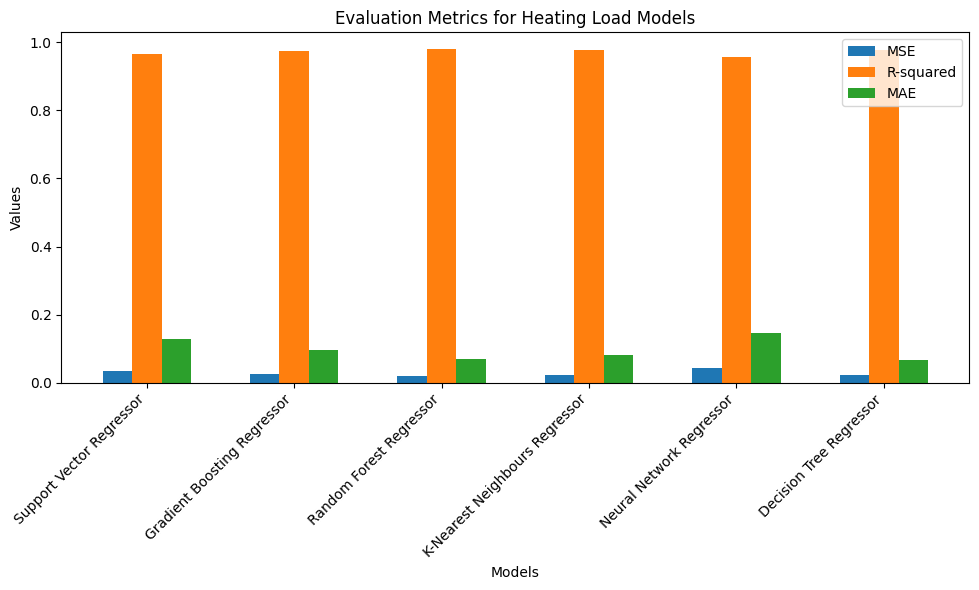

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract evaluation metrics for heating load models
model_names = [metric['Model'] for metric in evaluation_metrics]
mse_values = [metric['MSE'] for metric in evaluation_metrics]
r2_values = [metric['R-squared'] for metric in evaluation_metrics]
mae_values = [metric['MAE'] for metric in evaluation_metrics]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(model_names))

bar1 = ax.bar(index, mse_values, bar_width, label='MSE')
bar2 = ax.bar(index + bar_width, r2_values, bar_width, label='R-squared')
bar3 = ax.bar(index + 2*bar_width, mae_values, bar_width, label='MAE')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Evaluation Metrics for Heating Load Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


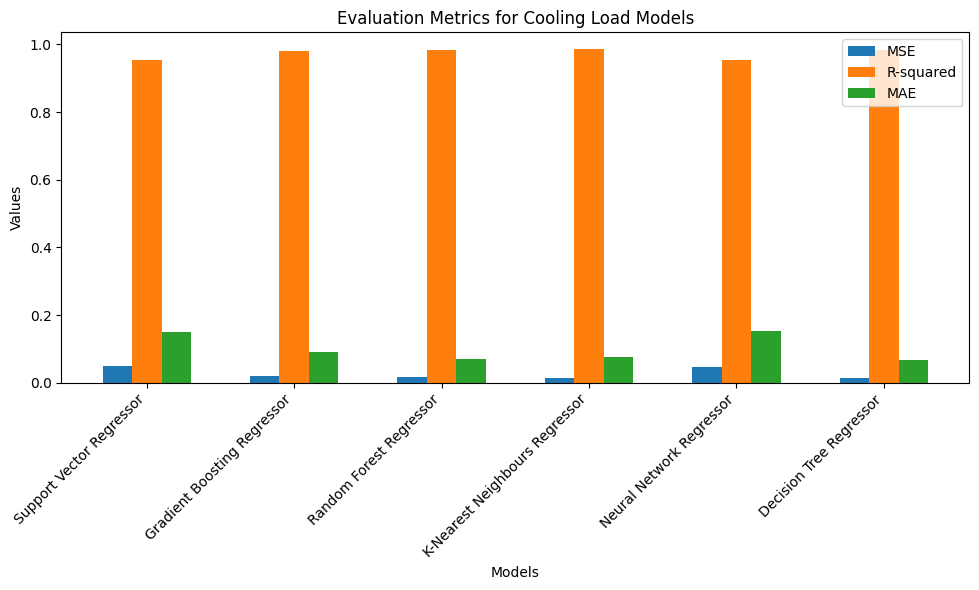

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract evaluation metrics for cooling load models
model_names = [metric['Model'] for metric in result]
mse_values = [metric['MSE'] for metric in result]
r2_values = [metric['R-squared'] for metric in result]
mae_values = [metric['MAE'] for metric in result]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(model_names))

bar1 = ax.bar(index, mse_values, bar_width, label='MSE')
bar2 = ax.bar(index + bar_width, r2_values, bar_width, label='R-squared')
bar3 = ax.bar(index + 2*bar_width, mae_values, bar_width, label='MAE')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Evaluation Metrics for Cooling Load Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor
import joblib

# Initialize and train the neural network model
neural_network_model = MLPRegressor()
neural_network_model.fit(X_train_selected_heating, y_train)  # Using selected features for heating load

# Save the model to a file
joblib.dump(neural_network_model, 'neural_network_model.pkl')


['neural_network_model.pkl']

In [ ]:
import joblib

# Load the saved model
loaded_neural_network_model = joblib.load('neural_network_model.pkl')

# Use the loaded model to predict the heating load on new data
heating_load_predictions = loaded_neural_network_model.predict(X_test_selected_heating)

# Print the predictions
print("Heating Load Predictions:")
print(heating_load_predictions)


Heating Load Predictions:
[-0.73051899 -0.8743892   0.84791971  1.91575974 -0.52975757  0.0664394
  0.12081735  0.54662343 -0.29890371  1.02352877 -0.38301091  1.16521935
  0.6150312  -1.18104022 -0.43933597  1.37635635  1.3868282  -1.0197215
 -0.88544506  1.12514302  0.82090591  1.8571636  -1.09558717  1.06029786
 -0.58076591  1.73299953  1.12996928  0.55490077 -0.41474334 -0.94557239
 -1.18555126 -1.00209086 -0.50601231  0.60917409  1.7348675   0.60404872
  0.93371696  1.07677018  1.0931821  -1.13881811  0.58644911 -1.04793053
 -1.35897372  0.68319459 -1.28088528 -1.32967258 -1.24345434 -1.1029964
  0.94808534  1.14713554  1.10184942 -0.92560563 -0.92194732  1.33038008
 -1.04271109 -0.55965901 -1.03206295  0.52110794  1.6134954   1.31666285
 -0.88579773 -0.73220568 -0.90457031  0.47707487  0.60598659  1.15490208
  1.64340334 -1.09388754 -0.93545223 -1.149463    0.58241512  0.85650214
 -1.01678097  0.10605153  1.13903437 -1.0250107   0.95253622  0.4658106
  0.89855605 -0.10078342  0.1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the original data to get mean and standard deviation
scaler.fit(data[['Heating Load']])

# Invert the normalization for the predicted values
heating_load_predictions_standard_scale = scaler.inverse_transform(heating_load_predictions.reshape(-1, 1))

# Create a DataFrame to store actual and predicted values
comparison_df = pd.DataFrame({'Actual Heating Load': data.loc[y_test.index, 'Heating Load'].values,
                              'Predicted Heating Load': heating_load_predictions_standard_scale.flatten()})

print(comparison_df)
# Save the DataFrame as a CSV file
comparison_df.to_csv('heating_load_comparison_results.csv', index=False)

     Actual Heating Load  Predicted Heating Load
0                  16.47               14.940921
1                  13.17               13.490188
2                  32.82               30.857304
3                  41.32               41.625002
4                  16.69               16.965324
..                   ...                     ...
149                38.98               41.463047
150                36.66               34.095547
151                29.34               30.684604
152                29.54               31.205508
153                12.17               11.995525

[154 rows x 2 columns]


In [ ]:
# Predict cooling load using the trained neural network model
cooling_load_predictions = loaded_neural_network_model.predict(X_test_selected_cooling)

# Convert predicted cooling load values from normalized form back to the standard scale
scaler.fit(data[['Cooling Load']])
cooling_load_predictions_standard_scale = scaler.inverse_transform(cooling_load_predictions.reshape(-1, 1))

# Create a DataFrame to store actual and predicted cooling load values
comparison_cooling_df = pd.DataFrame({'Actual Cooling Load': data.loc[y2_test.index, 'Cooling Load'].values,
                                      'Predicted Cooling Load': cooling_load_predictions_standard_scale.flatten()})

# Save the DataFrame as a CSV file
comparison_cooling_df.to_csv('cooling_load_comparison_results.csv', index=False)

